In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_export = pd.read_csv(r'C:\Users\Rameshwar Agarwal\Desktop\python\assignment 15\m2_case_study_v1.0\2018-2010_export.csv')
data_import = pd.read_csv(r'C:\Users\Rameshwar Agarwal\Desktop\python\assignment 15\m2_case_study_v1.0\2018-2010_import.csv')

In [3]:
def cleanup(data_df):
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

data_export = cleanup(data_export)
data_import = cleanup(data_import)

In [4]:
data_export['cat'] = 'E'
data_import['cat'] = 'I'

df = pd.concat([data_export,data_import],ignore_index=True)

In [5]:
df_q1 = data_export.groupby('country').agg({'value':'sum'})
df_q1 = df_q1.sort_values(by='value', ascending = False)
df_q1 = df_q1[:10]

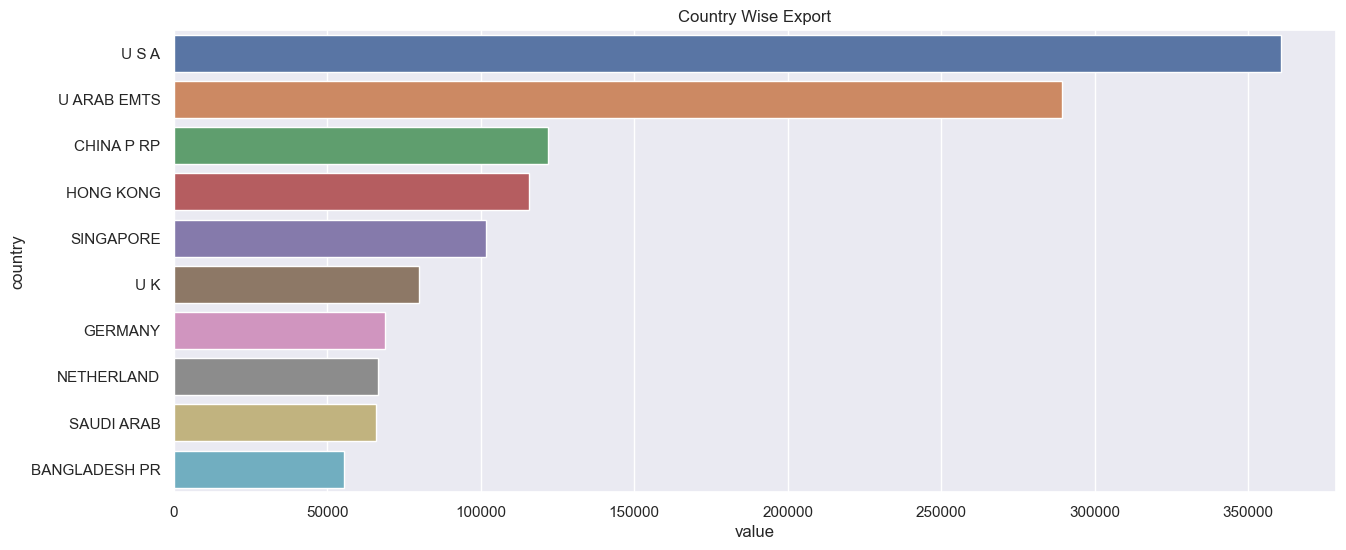

In [8]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(data=df, x=df_q1.value,y=df_q1.index).set_title('Country Wise Export');

In [9]:
from scipy.stats import skew

c1 = df['year'] == 2018
c2 = df['cat'] == 'I'
c3 = df['cat'] == 'E'
s1 = skew(df[c1 & c2].groupby('country')['value'].sum())
s2 = skew(df[c1 & c3].groupby('country')['value'].sum())
print("Import Skewness: {}, \nExport Skewness: {}".format(s1,s2))

Import Skewness: 5.776065084088766, 
Export Skewness: 7.629840041742824


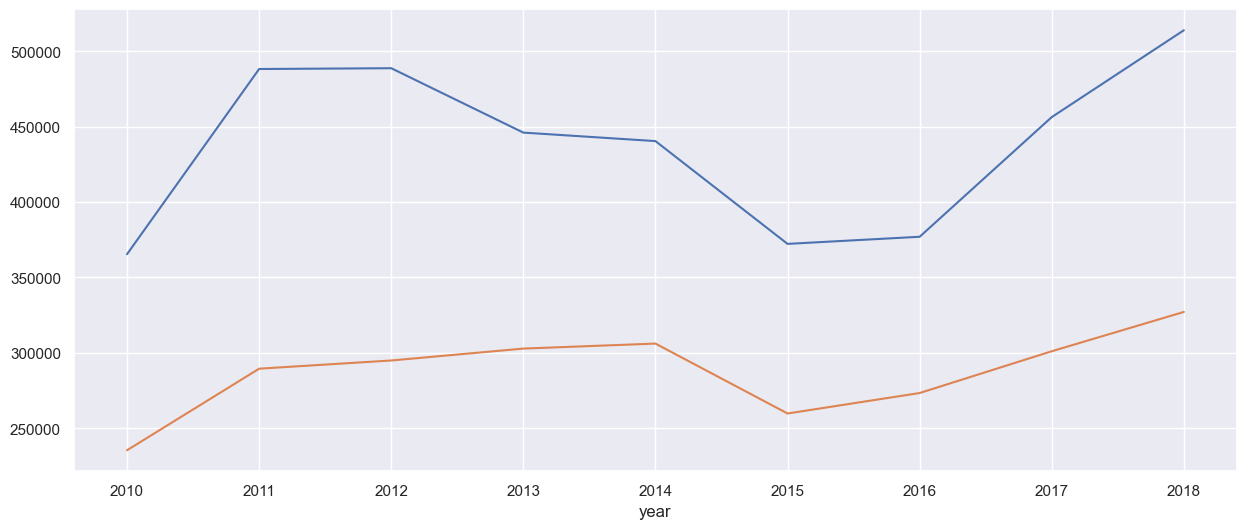

In [10]:
df[df['cat'] == 'I'].groupby(['year'])['value'].sum().plot();
df[df['cat'] == 'E'].groupby(['year'])['value'].sum().plot();

In [11]:
df[(df['country'] == 'U K') & (df['cat'] == 'E')].groupby(['year']).max()[['value', 'Commodity']]

,value,Commodity
year,,
2010,844.55,ZINC AND ARTICLES THEREOF.
2011,913.12,ZINC AND ARTICLES THEREOF.
2012,811.08,ZINC AND ARTICLES THEREOF.
2013,1101.94,ZINC AND ARTICLES THEREOF.
2014,955.88,ZINC AND ARTICLES THEREOF.
2015,905.79,ZINC AND ARTICLES THEREOF.
2016,827.34,ZINC AND ARTICLES THEREOF.
2017,1018.49,ZINC AND ARTICLES THEREOF.
2018,1063.26,ZINC AND ARTICLES THEREOF.


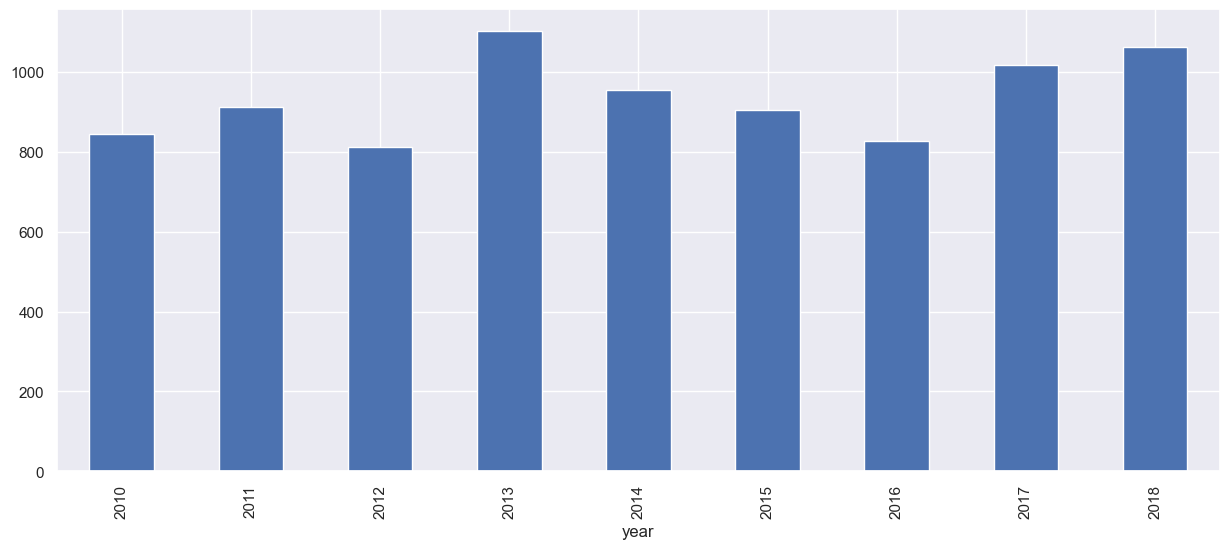

In [12]:
df[(df['country'] == 'U K') & (df['cat'] == 'E')].groupby(['year']).max()['value'].plot(x='Year', y='Maximum value',kind="bar");

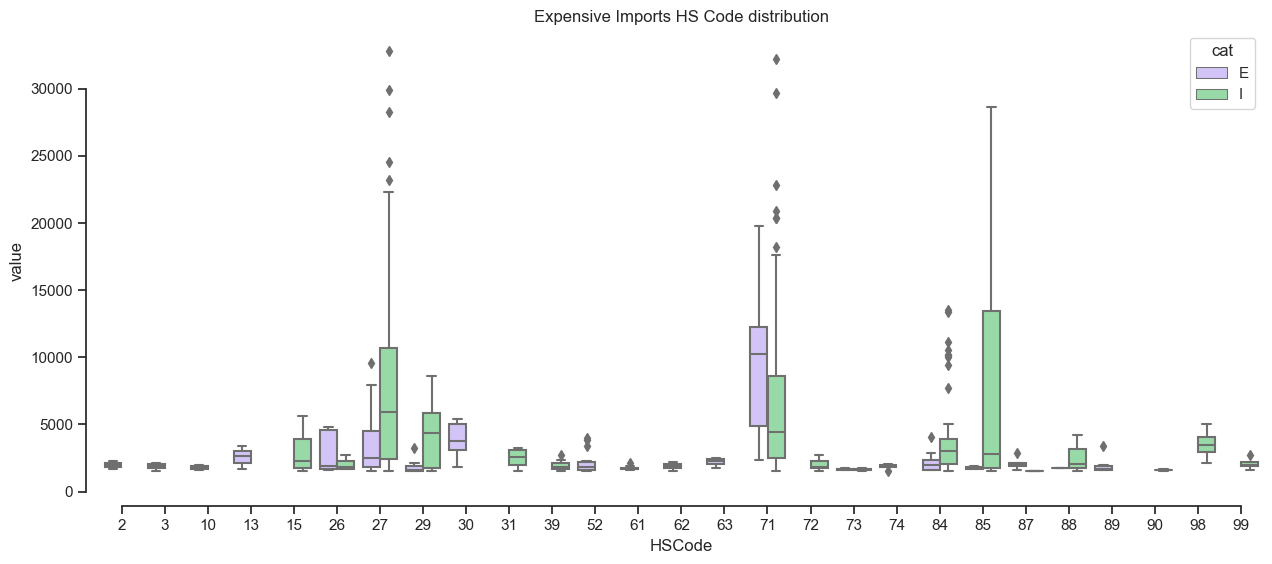

In [13]:
thresh = 1500
df_1 = df[(df.value > thresh)]
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="HSCode", y="value", palette=["m", "g"], hue =  'cat',data=df_1).set_title('Expensive Imports HS Code distribution');
sns.despine(offset=10, trim=True)

In [14]:
x = pd.DataFrame(df[(df.country == 'AUSTRALIA') & (df.cat == 'I')].groupby(['year']).sum()['value']).reset_index()

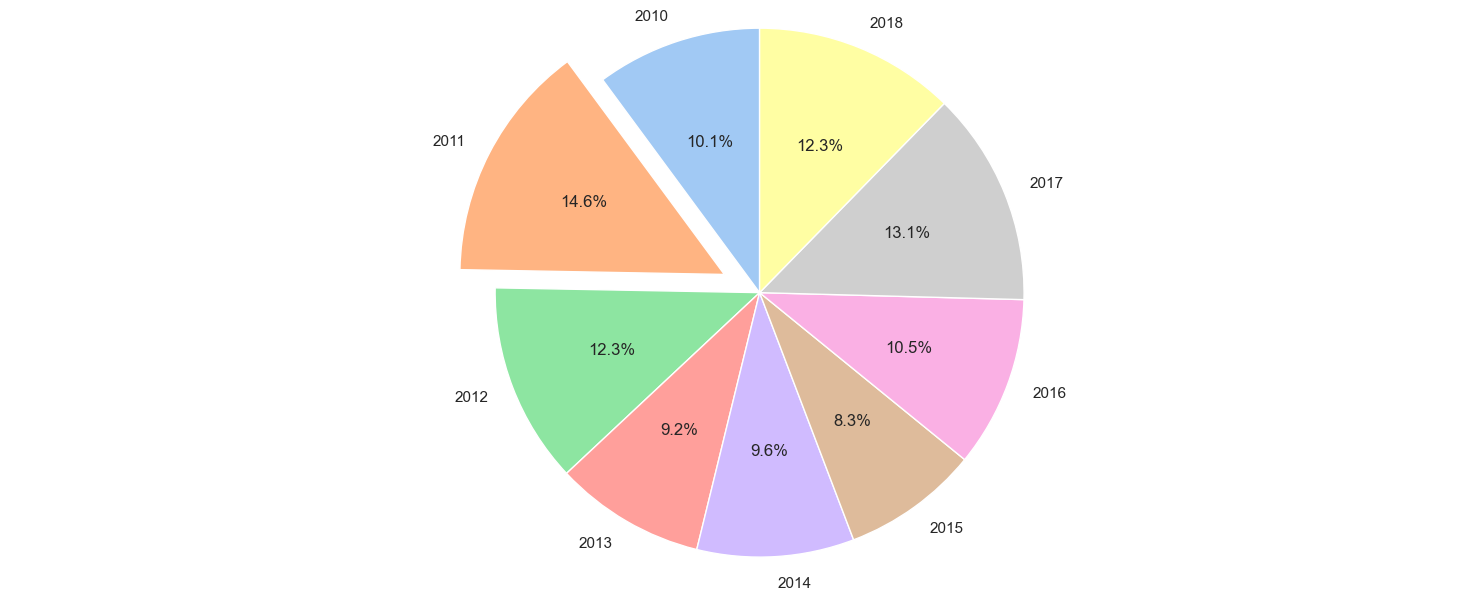

In [15]:
plt.pie(x['value'],labels=x['year'],shadow=False,explode=(0,0.15,0,0,0,0,0,0,0),startangle=90,autopct='%1.1f%%');

plt.axis('equal')
plt.tight_layout()
plt.show()